### Importação dos dados



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [16]:
# Calcular o faturamento total de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Criar um DataFrame para comparar os faturamentos
faturamentos = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# Exibir os faturamentos
print("Faturamento Total por Loja:\n")
print(faturamentos.to_markdown(index=False, numalign="left", stralign="left"))

Faturamento Total por Loja:

| Loja   | Faturamento   |
|:-------|:--------------|
| Loja 1 | 1.53451e+06   |
| Loja 2 | 1.48846e+06   |
| Loja 3 | 1.46403e+06   |
| Loja 4 | 1.3845e+06    |


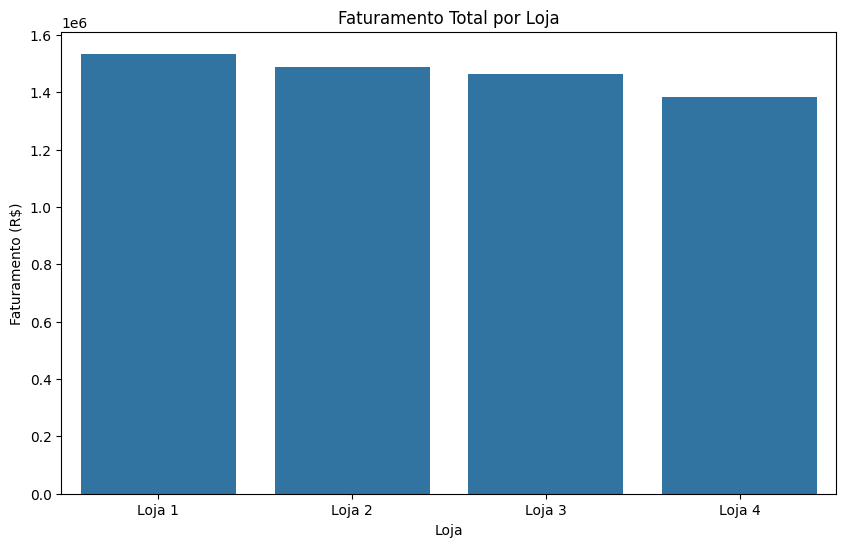

In [17]:
# Gráfico de Barras: Faturamento Total por Loja
plt.figure(figsize=(10, 6))
sns.barplot(x='Loja', y='Faturamento', data=faturamentos)
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.show()

# 2. Vendas por Categoria


In [18]:
# Calcular a quantidade de produtos vendidos por categoria em cada loja
vendas_por_categoria_loja1 = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade')
vendas_por_categoria_loja2 = loja2.groupby('Categoria do Produto').size().reset_index(name='Quantidade')
vendas_por_categoria_loja3 = loja3.groupby('Categoria do Produto').size().reset_index(name='Quantidade')
vendas_por_categoria_loja4 = loja4.groupby('Categoria do Produto').size().reset_index(name='Quantidade')

# Adicionar uma coluna para identificar a loja em cada DataFrame
vendas_por_categoria_loja1['Loja'] = 'Loja 1'
vendas_por_categoria_loja2['Loja'] = 'Loja 2'
vendas_por_categoria_loja3['Loja'] = 'Loja 3'
vendas_por_categoria_loja4['Loja'] = 'Loja 4'

# Concatenar os resultados em um único DataFrame para facilitar a comparação
vendas_por_categoria = pd.concat([vendas_por_categoria_loja1, vendas_por_categoria_loja2, vendas_por_categoria_loja3, vendas_por_categoria_loja4])

# Exibir os resultados
print("Quantidade de Produtos Vendidos por Categoria em Cada Loja:\n")
print(vendas_por_categoria.to_markdown(index=False, numalign="left", stralign="left"))



Quantidade de Produtos Vendidos por Categoria em Cada Loja:

| Categoria do Produto   | Quantidade   | Loja   |
|:-----------------------|:-------------|:-------|
| brinquedos             | 324          | Loja 1 |
| eletrodomesticos       | 312          | Loja 1 |
| eletronicos            | 448          | Loja 1 |
| esporte e lazer        | 284          | Loja 1 |
| instrumentos musicais  | 182          | Loja 1 |
| livros                 | 173          | Loja 1 |
| moveis                 | 465          | Loja 1 |
| utilidades domesticas  | 171          | Loja 1 |
| brinquedos             | 313          | Loja 2 |
| eletrodomesticos       | 305          | Loja 2 |
| eletronicos            | 422          | Loja 2 |
| esporte e lazer        | 275          | Loja 2 |
| instrumentos musicais  | 224          | Loja 2 |
| livros                 | 197          | Loja 2 |
| moveis                 | 442          | Loja 2 |
| utilidades domesticas  | 181          | Loja 2 |
| brinquedos         

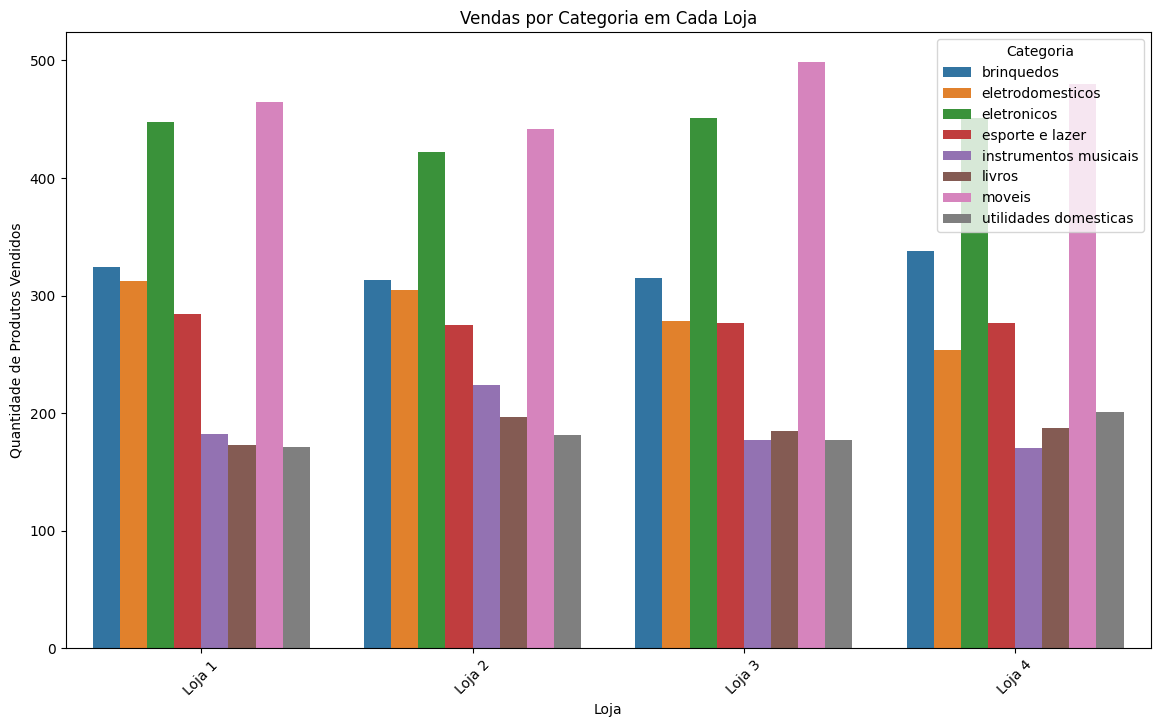

In [19]:
# Gráfico de Barras Agrupadas: Vendas por Categoria
plt.figure(figsize=(14, 8))
sns.barplot(x='Loja', y='Quantidade', hue='Categoria do Produto', data=vendas_por_categoria)
plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Loja')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.show()



# 3. Média de Avaliação das Lojas

In [20]:
# Calcular a média das avaliações para cada loja
media_avaliacoes_loja1 = loja['Avaliação da compra'].mean()
media_avaliacoes_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacoes_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacoes_loja4 = loja4['Avaliação da compra'].mean()

# Criar um DataFrame para comparar as médias das avaliações
medias_avaliacoes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [media_avaliacoes_loja1, media_avaliacoes_loja2, media_avaliacoes_loja3, media_avaliacoes_loja4]
})

# Exibir as médias das avaliações
print("Média de Avaliação por Loja:\n")
print(medias_avaliacoes.to_markdown(index=False, numalign="left", stralign="left"))

Média de Avaliação por Loja:

| Loja   | Média de Avaliação   |
|:-------|:---------------------|
| Loja 1 | 3.97669              |
| Loja 2 | 4.0373               |
| Loja 3 | 4.04833              |
| Loja 4 | 3.99576              |


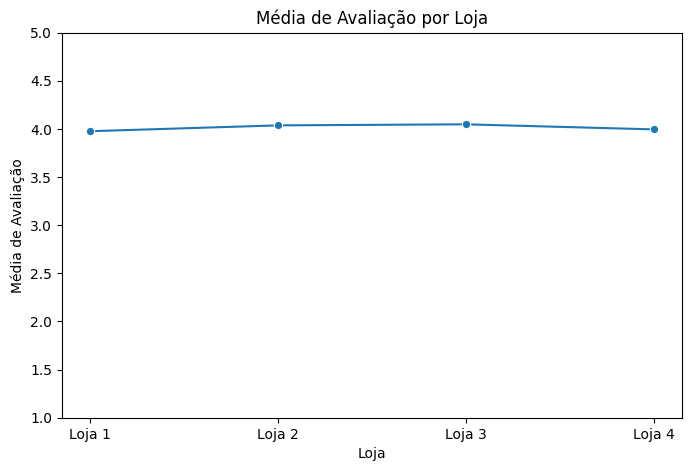

In [21]:
# Gráfico de Linhas: Média de Avaliação por Loja
plt.figure(figsize=(8, 5))
sns.lineplot(x='Loja', y='Média de Avaliação', data=medias_avaliacoes, marker='o')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(1, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [22]:
# Calcular os produtos mais e menos vendidos em cada loja
mais_vendidos_loja1 = loja['Produto'].value_counts().head(5)
menos_vendidos_loja1 = loja['Produto'].value_counts().tail(5)

mais_vendidos_loja2 = loja2['Produto'].value_counts().head(5)
menos_vendidos_loja2 = loja2['Produto'].value_counts().tail(5)

mais_vendidos_loja3 = loja3['Produto'].value_counts().head(5)
menos_vendidos_loja3 = loja3['Produto'].value_counts().tail(5)

mais_vendidos_loja4 = loja4['Produto'].value_counts().head(5)
menos_vendidos_loja4 = loja4['Produto'].value_counts().tail(5)

# Criar DataFrames para facilitar a visualização
def criar_df_produtos(mais_vendidos, menos_vendidos, loja_nome):
    df_mais = pd.DataFrame({'Loja': [loja_nome] * len(mais_vendidos.index),
                            'Produto': mais_vendidos.index,
                            'Quantidade': mais_vendidos.values,
                            'Tipo': ['Mais Vendido'] * len(mais_vendidos.index)})
    df_menos = pd.DataFrame({'Loja': [loja_nome] * len(menos_vendidos.index),
                             'Produto': menos_vendidos.index,
                             'Quantidade': menos_vendidos.values,
                             'Tipo': ['Menos Vendido'] * len(menos_vendidos.index)})
    return pd.concat([df_mais, df_menos])

df_produtos_loja1 = criar_df_produtos(mais_vendidos_loja1, menos_vendidos_loja1, 'Loja 1')
df_produtos_loja2 = criar_df_produtos(mais_vendidos_loja2, menos_vendidos_loja2, 'Loja 2')
df_produtos_loja3 = criar_df_produtos(mais_vendidos_loja3, menos_vendidos_loja3, 'Loja 3')
df_produtos_loja4 = criar_df_produtos(mais_vendidos_loja4, menos_vendidos_loja4, 'Loja 4')

# Concatenar todos os DataFrames
df_produtos_todas_lojas = pd.concat([df_produtos_loja1, df_produtos_loja2, df_produtos_loja3, df_produtos_loja4])

# Exibir os resultados
print("Produtos Mais e Menos Vendidos por Loja:\n")
print(df_produtos_todas_lojas.to_markdown(index=False, numalign="left", stralign="left"))


Produtos Mais e Menos Vendidos por Loja:

| Loja   | Produto                     | Quantidade   | Tipo          |
|:-------|:----------------------------|:-------------|:--------------|
| Loja 1 | Micro-ondas                 | 60           | Mais Vendido  |
| Loja 1 | TV Led UHD 4K               | 60           | Mais Vendido  |
| Loja 1 | Guarda roupas               | 60           | Mais Vendido  |
| Loja 1 | Secadora de roupas          | 58           | Mais Vendido  |
| Loja 1 | Cômoda                      | 56           | Mais Vendido  |
| Loja 1 | Ciência de dados com python | 39           | Menos Vendido |
| Loja 1 | Pandeiro                    | 36           | Menos Vendido |
| Loja 1 | Panela de pressão           | 35           | Menos Vendido |
| Loja 1 | Headset                     | 33           | Menos Vendido |
| Loja 1 | Celular ABXY                | 33           | Menos Vendido |
| Loja 2 | Iniciando em programação    | 65           | Mais Vendido  |
| Loja 2 | Micro-ondas

# 5. Frete Médio por Loja


In [23]:
# Calcular o frete médio para cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Criar um DataFrame para comparar os fretes médios
fretes_medios = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

# Exibir os fretes médios
print("Frete Médio por Loja:\n")
print(fretes_medios.to_markdown(index=False, numalign="left", stralign="left"))

Frete Médio por Loja:

| Loja   | Frete Médio   |
|:-------|:--------------|
| Loja 1 | 34.6918       |
| Loja 2 | 33.6219       |
| Loja 3 | 33.0745       |
| Loja 4 | 31.279        |


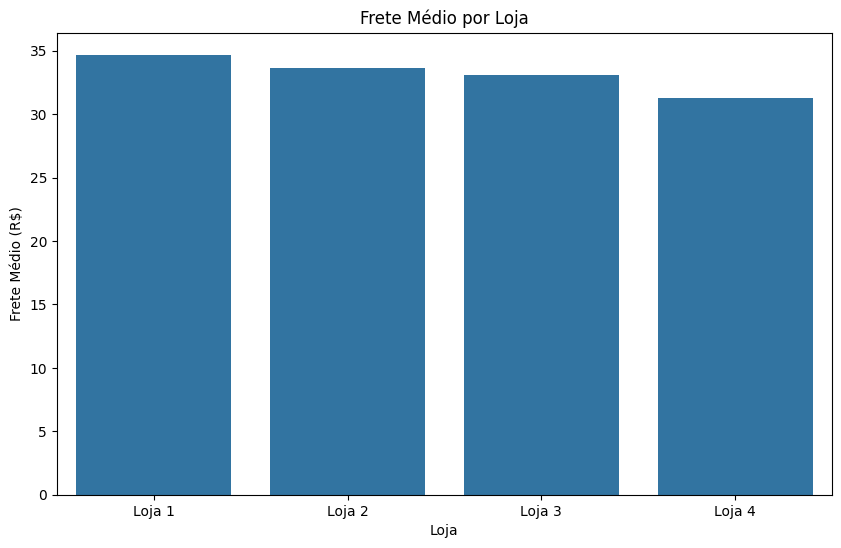

In [24]:
# Gráfico de Barras: Frete Médio por Loja
plt.figure(figsize=(10, 6))
sns.barplot(x='Loja', y='Frete Médio', data=fretes_medios)
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.show()